In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [2]:
#importing the data
data = pd.read_csv('Pokemon.csv')
df = pd.DataFrame(data)
display(df)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [ ]:
df = pd.DataFrame(data)
display(df)

In [48]:
df2 = df.iloc[:,[32,30,28,19,25,33,34,35,36,37,39]]
df2

,pokedex_number,name,hp,attack,defense,sp_attack,sp_defense,speed,type1,type2,generation
0,1,Bulbasaur,45,49,49,65,65,45,grass,poison,1
1,2,Ivysaur,60,62,63,80,80,60,grass,poison,1
2,3,Venusaur,80,100,123,122,120,80,grass,poison,1
3,4,Charmander,39,52,43,60,50,65,fire,NaN,1
4,5,Charmeleon,58,64,58,80,65,80,fire,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
796,797,Celesteela,97,101,103,107,101,61,steel,flying,7
797,798,Kartana,59,181,131,59,31,109,grass,steel,7
798,799,Guzzlord,223,101,53,97,53,43,dark,dragon,7
799,800,Necrozma,97,107,101,127,89,79,psychic,NaN,7


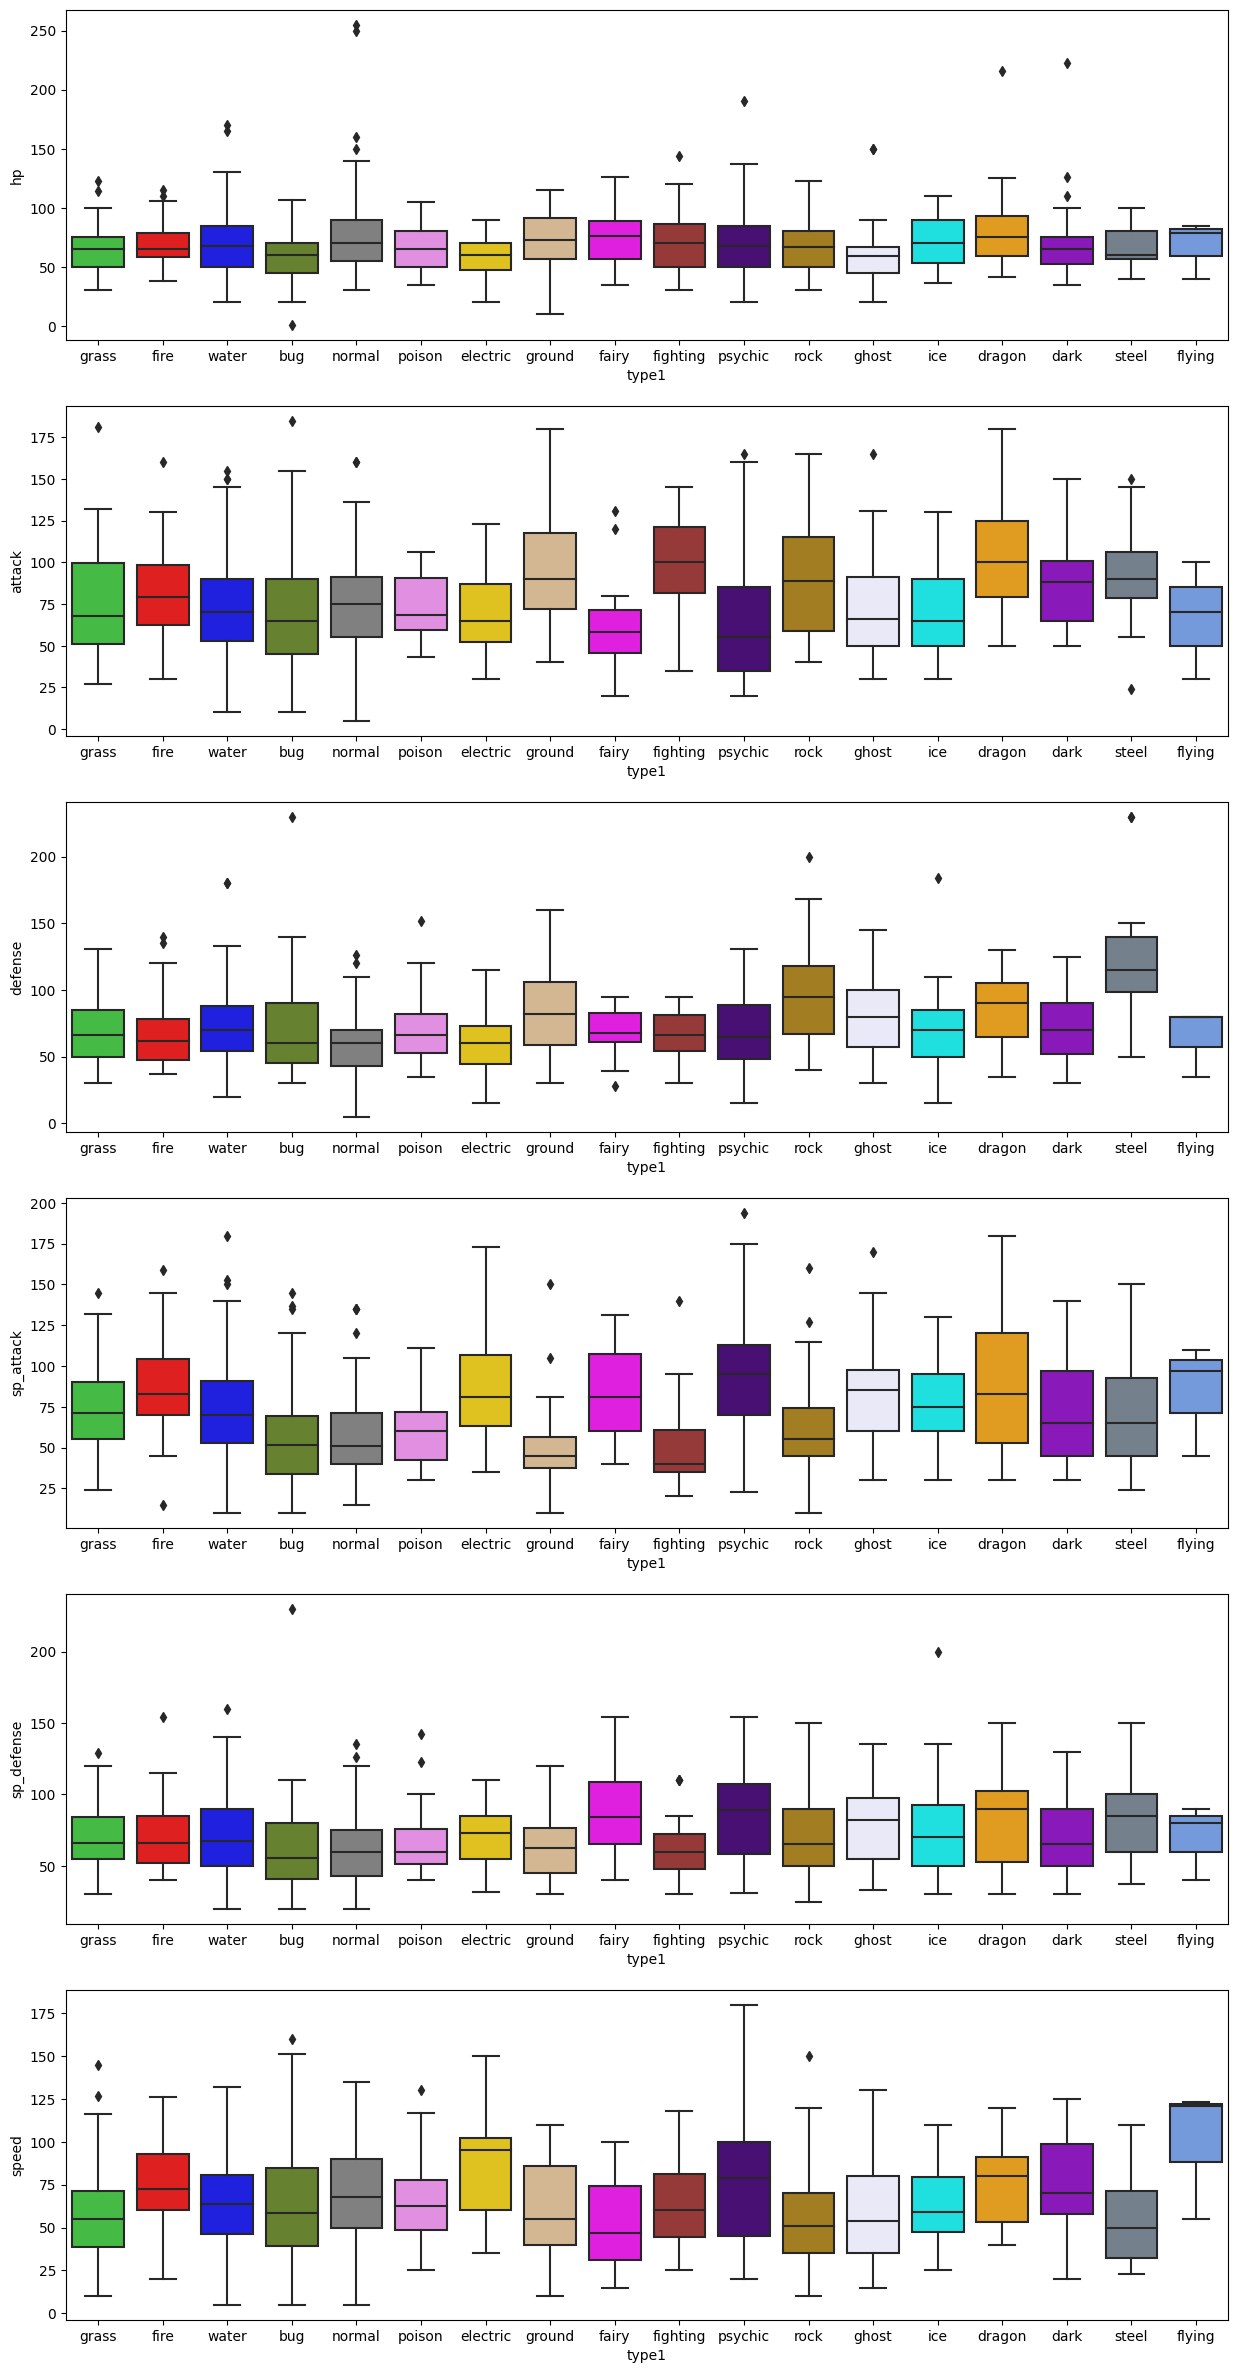

In [49]:
#Define a palette for each type of pokemon
pallette = ['limegreen', 'red', 'blue', 'olivedrab', 'grey', 'violet', 'gold','burlywood','magenta','brown', 'indigo', 'darkgoldenrod', 'lavender', 'aqua', 'orange', 'darkviolet', 'slategrey', 'cornflowerblue']
col_data = df2.columns[2:8]


#plotting the boxplots
fig, axis = plt.subplots(6,figsize=(15, 30))
for i in range(0,6):
    sns.boxplot(data=df2, x='type1', y=col_data[i], ax = axis[i], palette=pallette)


In [45]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'r = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

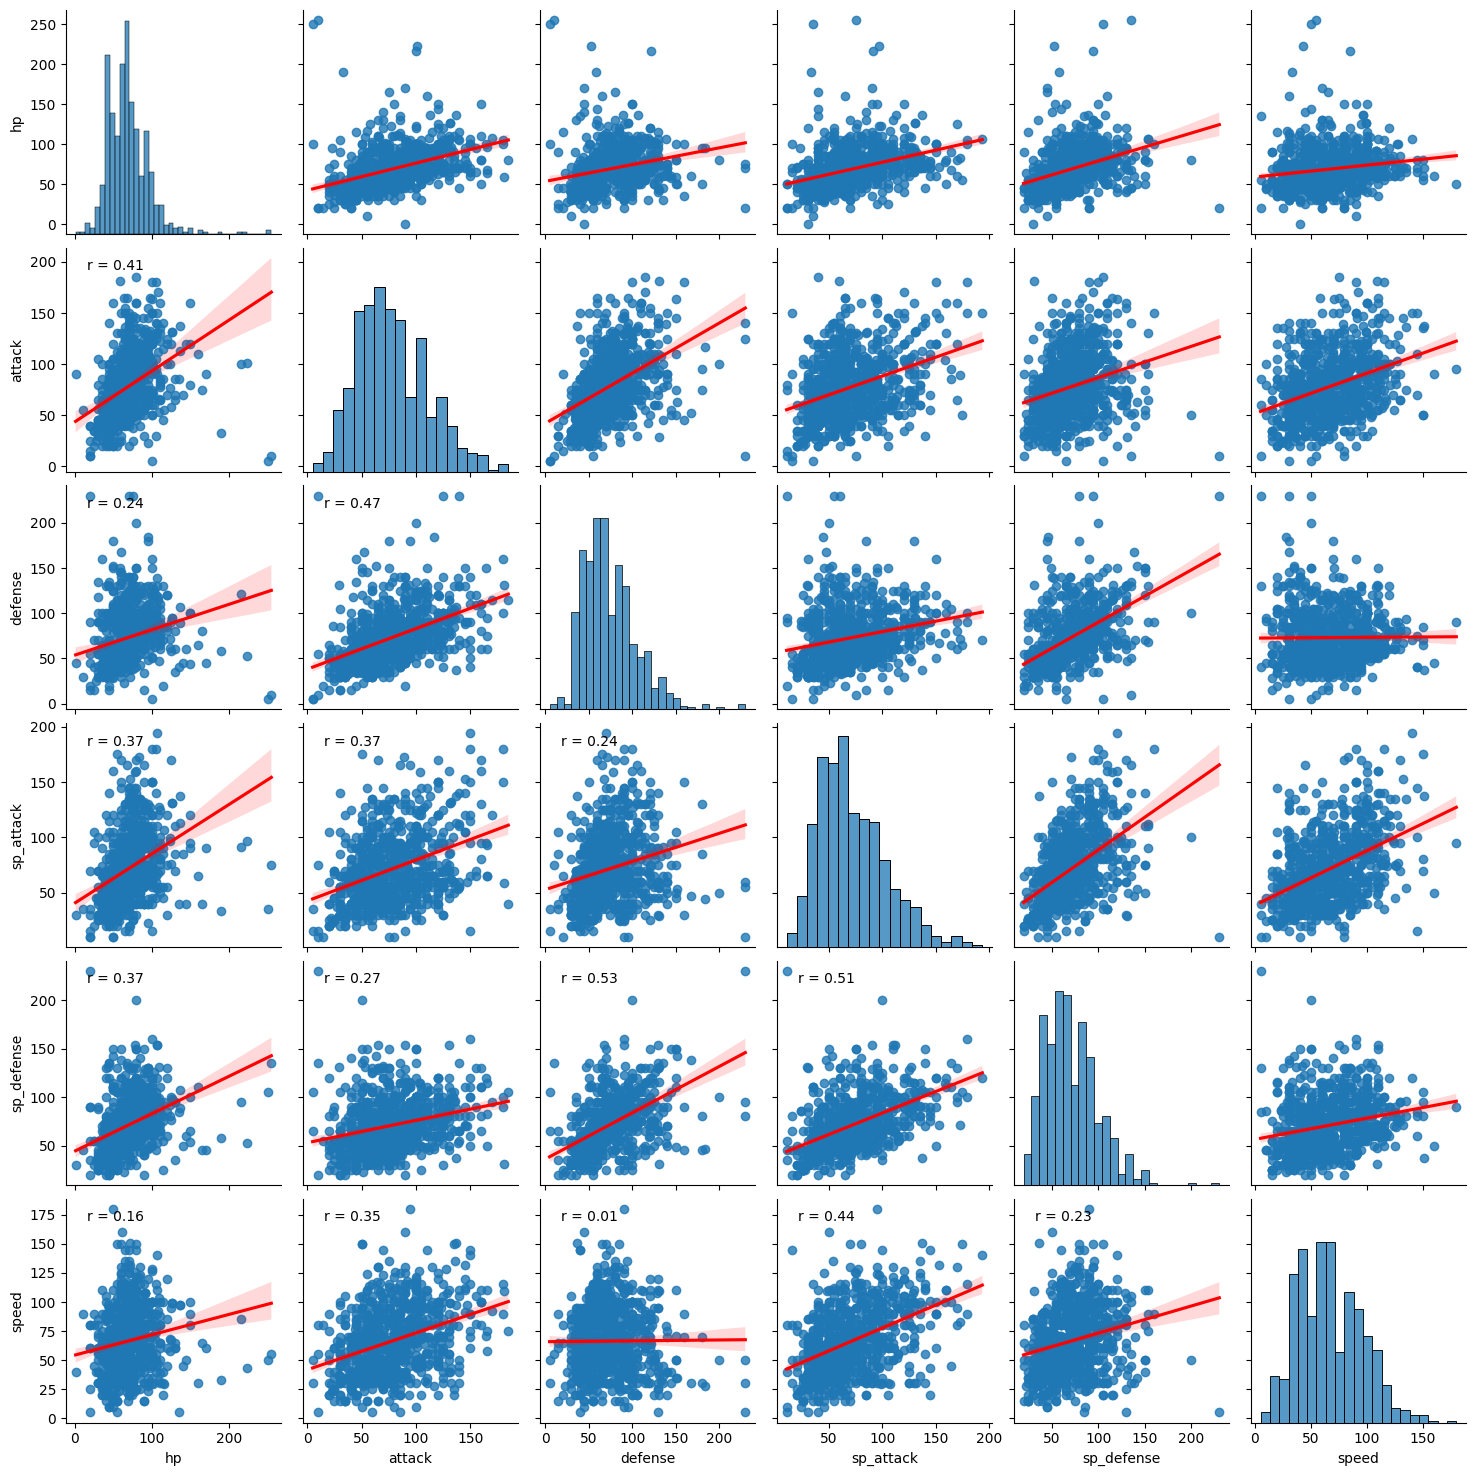

In [50]:
#plotting the correlation between the different stats
colDF = df2.iloc[:,2:8] #select the numeric values 
pair = sns.pairplot(colDF, kind="reg", plot_kws={'line_kws':{'color':'red'}}) #create pairplot
pair.map_lower(corrfunc) #calculate the correlation coefficient

<AxesSubplot: >

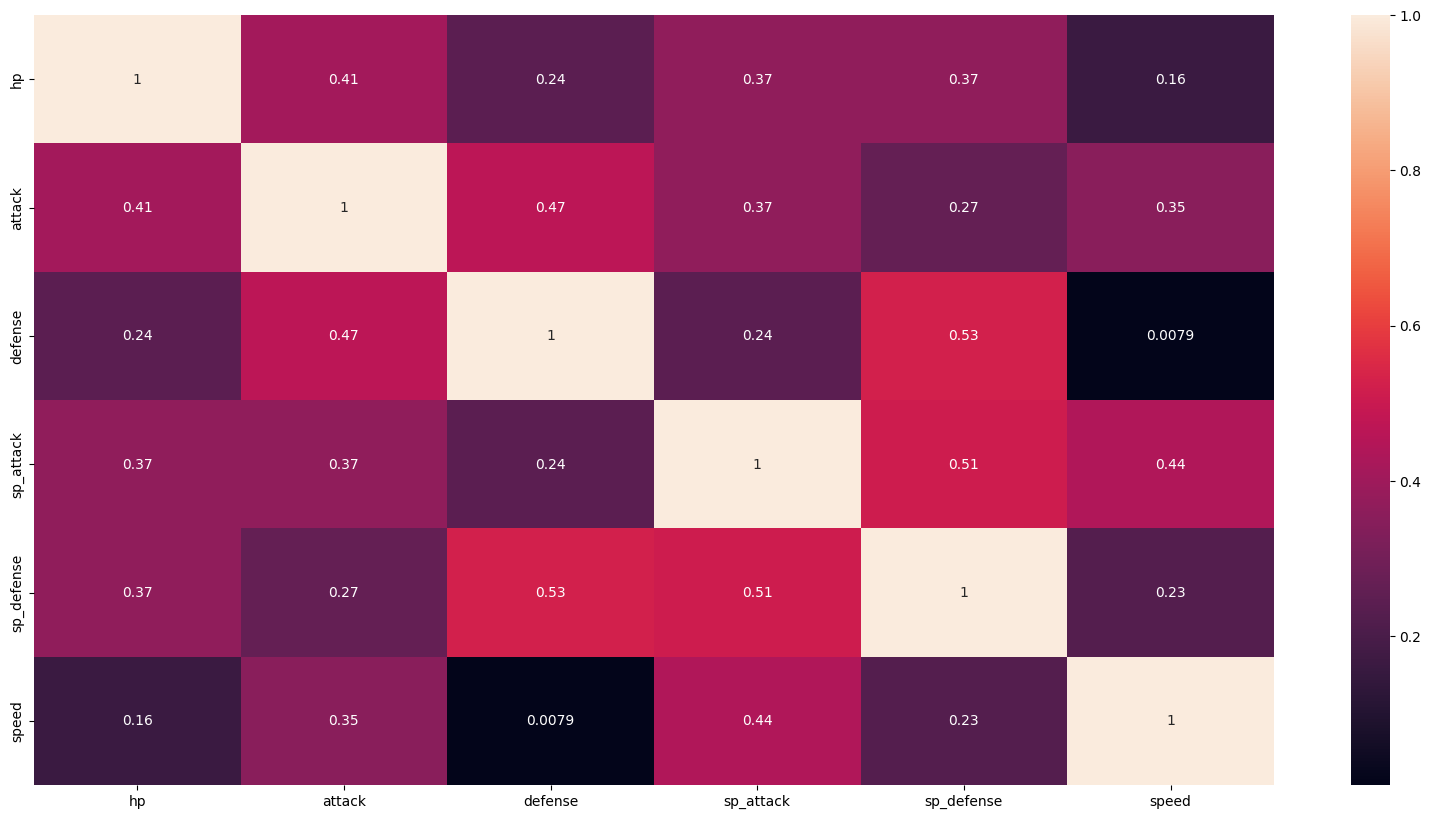

In [51]:
plt.figure(figsize=(20,10))
sns.heatmap(colDF.corr(), annot=True)


## All generations

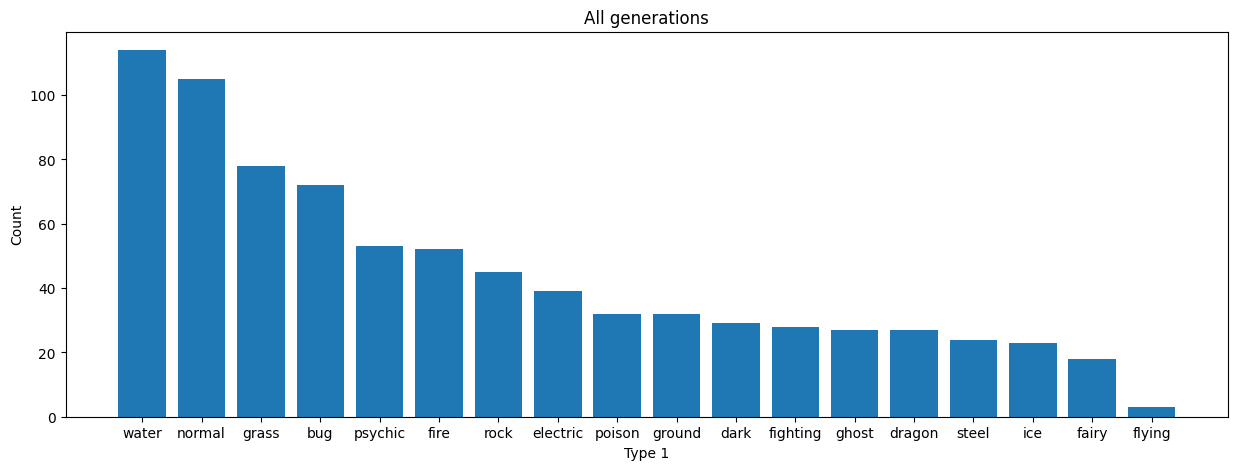

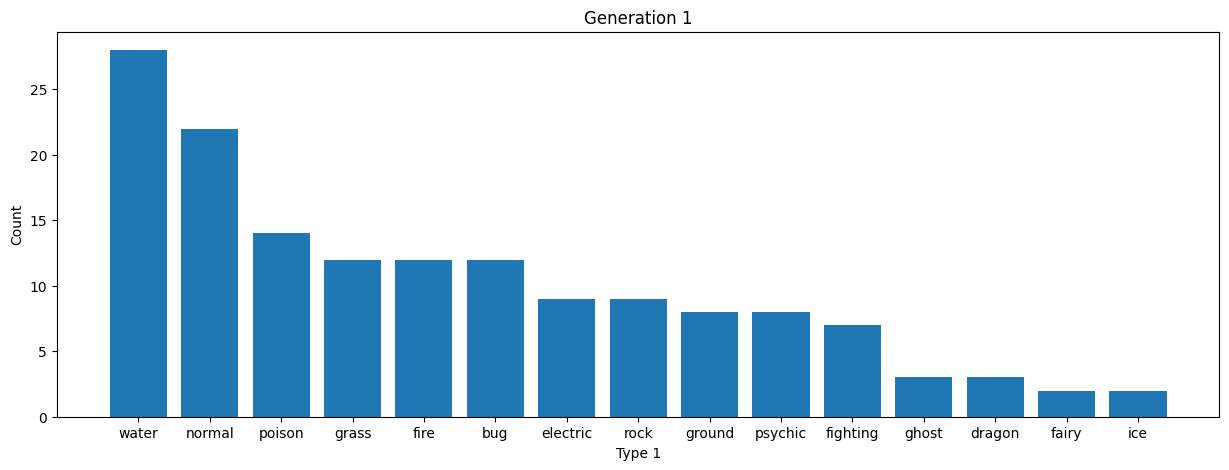

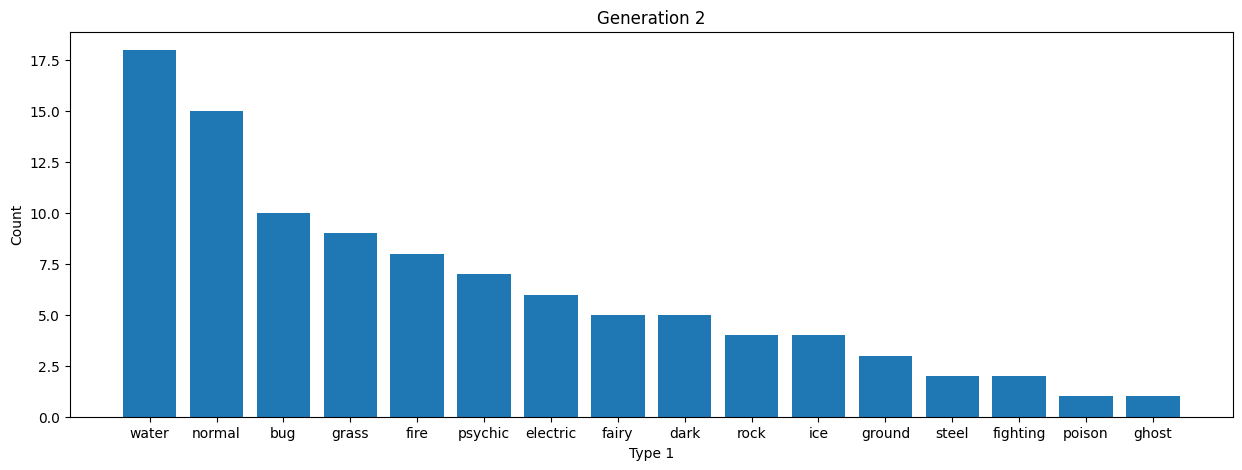

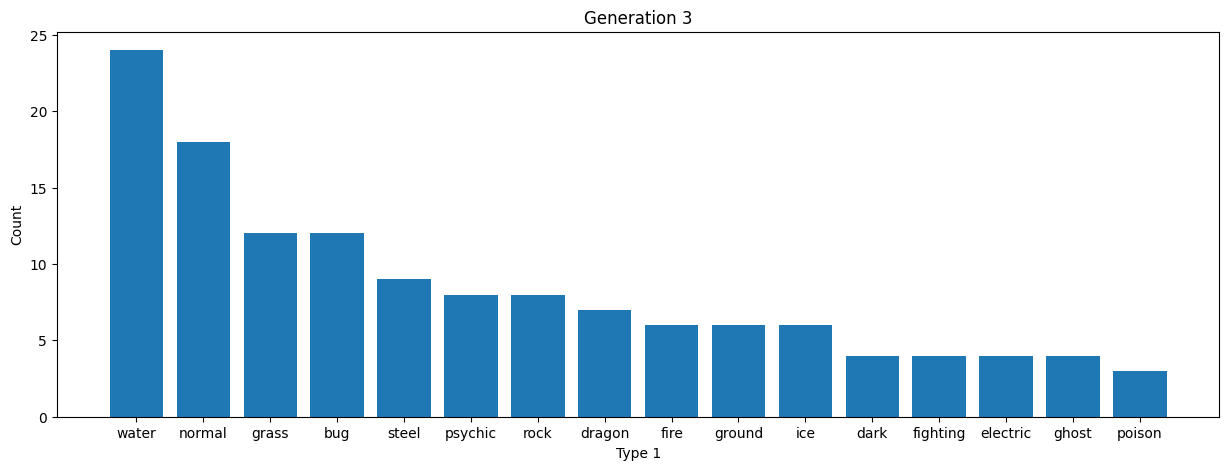

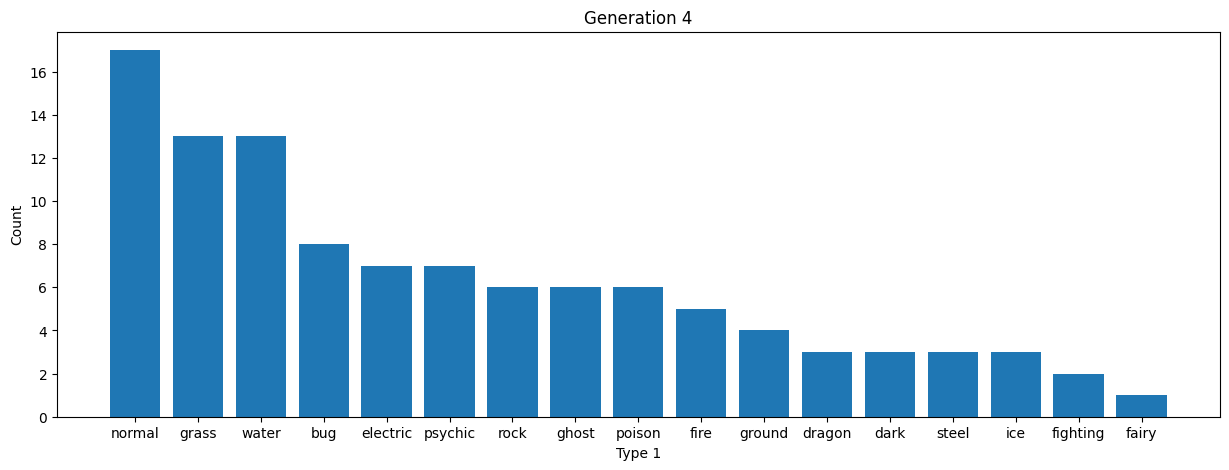

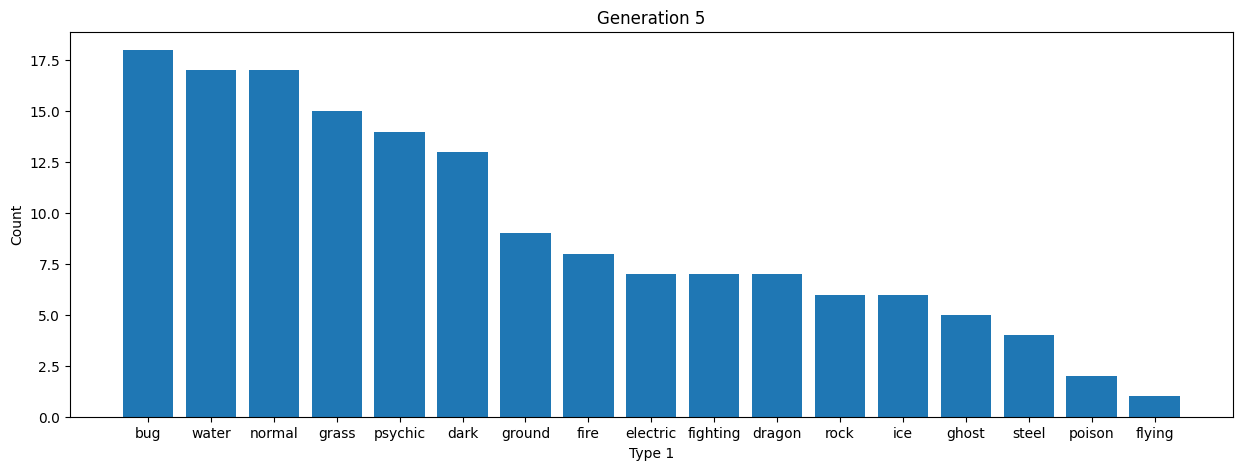

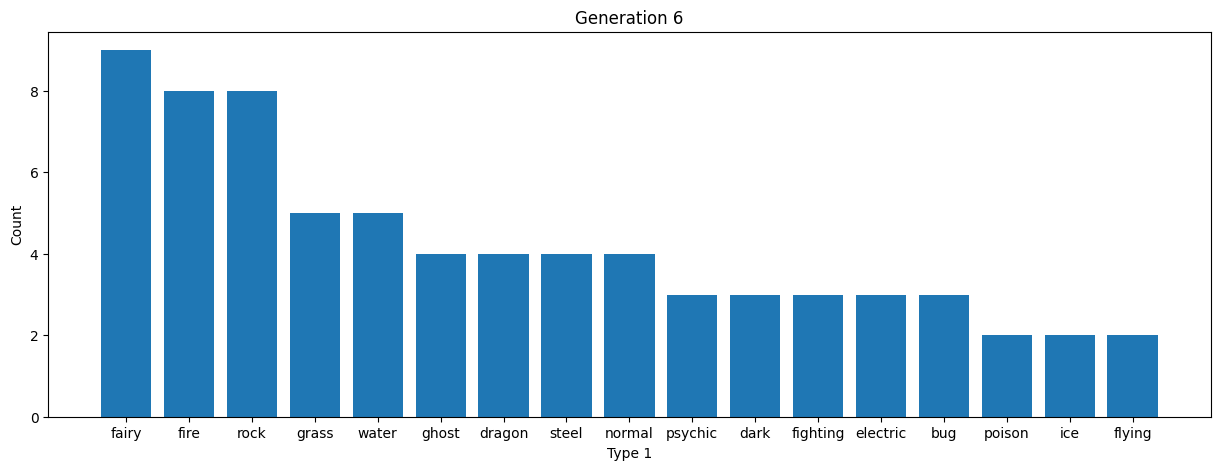

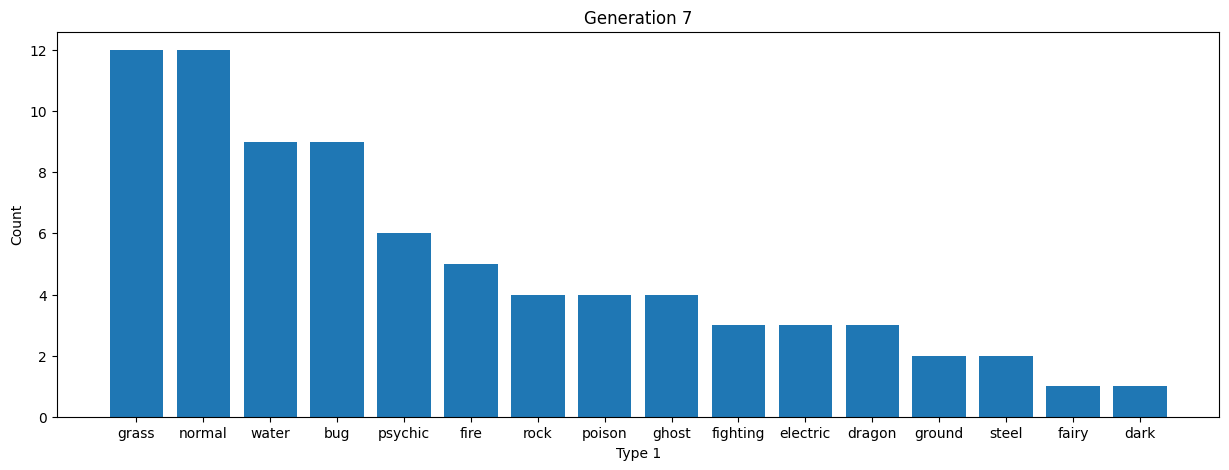

In [54]:
#count the number of each type of pokemon
counts = df['type1'].value_counts()

#Create figure
plt.figure(figsize=(15,5))

# Create a bar plot of the counts
plt.bar(counts.index, counts.values)

# Add labels and title
plt.xlabel('Type 1')
plt.ylabel('Count')
plt.title('All generations')

for i in range(1,8):
    counts = df[df['generation']==i]['type1'].value_counts()

    plt.figure(figsize=(15,5))
    # Create a bar plot of the counts
    plt.bar(counts.index, counts.values)

    # Add labels and title
    plt.xlabel('Type 1')
    plt.ylabel('Count')
    plt.title('Generation ' + str(i) )